In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train[0].shape

(28, 28)

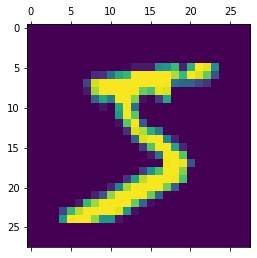

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flattened = X_train_flattened/255
X_test_flattened = X_test_flattened/255

In [26]:
X_test_flattened.shape

(10000, 784)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 452us/step - loss: 0.4692 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 1s 356us/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 363us/step - loss: 0.2834 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 1s 363us/step - loss: 0.2730 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 1s 377us/step - loss: 0.2669 - accuracy: 0.9251


In [33]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 528us/step - loss: 0.2674 - accuracy: 0.9256


[0.2673775553703308, 0.925599992275238]

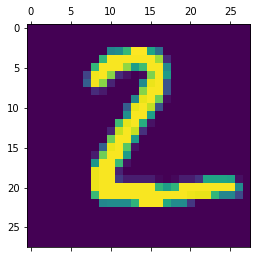

In [46]:
plt.matshow(X_test[1])

In [37]:
y_pred = model.predict(X_test_flattened)

In [50]:
y_pred[1]

array([4.1591901e-01, 5.4249465e-03, 9.9947345e-01, 3.6105418e-01,
       8.9347973e-10, 8.4249866e-01, 9.1112244e-01, 1.4497995e-12,
       1.3226864e-01, 1.3016156e-09], dtype=float32)

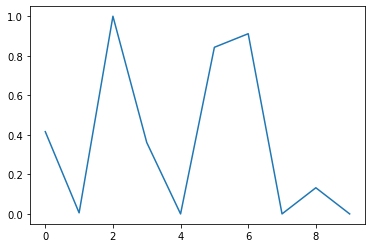

In [51]:
plt.plot(y_pred[1])

In [52]:
np.argmax(y_pred[1])

2

In [54]:
y_predicted = [np.argmax(i) for i in y_pred ]

In [60]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [62]:
y_predicted[:5]

[7, 2, 1, 0, 4]

In [63]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,    9,  919,   15,    9,    5,   12,   12,   38,    5],
       [   4,    0,   18,  910,    0,   30,    3,   13,   23,    9],
       [   1,    1,    2,    1,  913,    0,   13,    4,    9,   38],
       [  10,    2,    2,   19,    9,  788,   17,    7,   30,    8],
       [  12,    3,    5,    1,    7,    9,  918,    2,    1,    0],
       [   1,    6,   22,    3,    7,    1,    0,  952,    2,   34],
       [   8,   11,    5,   18,    9,   34,   10,   14,  858,    7],
       [  11,    7,    1,    7,   25,    8,    0,   29,    5,  916]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

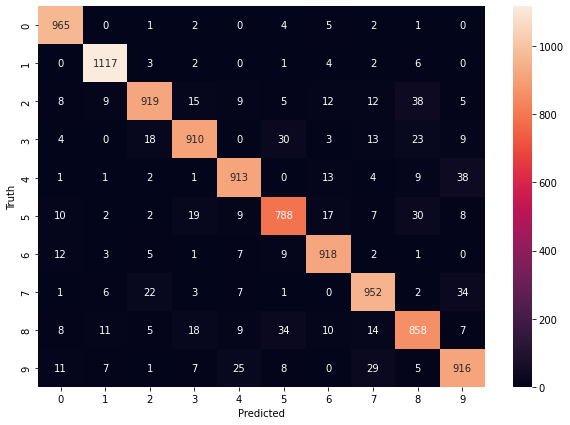

In [65]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [68]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 629us/step - loss: 0.2806 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 1s 751us/step - loss: 0.1275 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 1s 602us/step - loss: 0.0883 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 1s 583us/step - loss: 0.0674 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 587us/step - loss: 0.0533 - accuracy: 0.9840


In [73]:
model.evaluate(X_test_flattened, y_test)
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 664us/step - loss: 0.0883 - accuracy: 0.9734


In [74]:
y_predicted = [np.argmax(i) for i in y_pred ]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    2,    0,    1,    1,    0,    1,    1],
       [   0, 1127,    2,    1,    0,    1,    2,    0,    2,    0],
       [   9,    8,  991,    6,    2,    0,    2,   10,    4,    0],
       [   0,    2,    2,  989,    0,    4,    1,    4,    3,    5],
       [   1,    3,    1,    1,  955,    0,    6,    4,    1,   10],
       [   4,    0,    0,   10,    0,  872,    2,    1,    2,    1],
       [   7,    3,    3,    1,    4,    6,  931,    2,    1,    0],
       [   2,   12,    6,    3,    1,    1,    0,  996,    1,    6],
       [   8,    2,    5,    8,    5,    9,    2,    4,  925,    6],
       [   2,    5,    0,    5,    6,   10,    1,    4,    1,  975]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

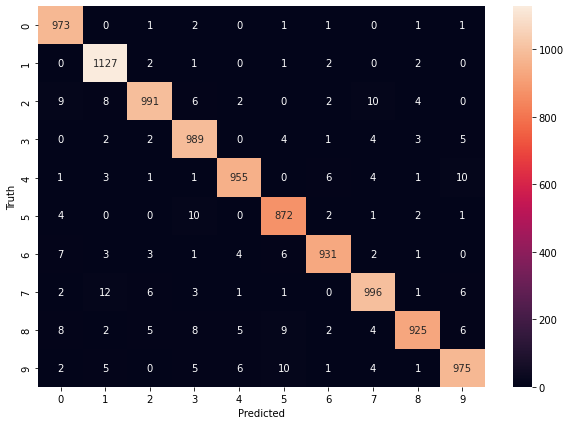

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Keras inbuilt func. flattening the input features
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5) # Not flattening X_train by ourselves

Epoch 1/5
1875/1875 [==============================] - 1s 607us/step - loss: 2.2090 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 1s 567us/step - loss: 0.3956 - accuracy: 0.9042
Epoch 3/5
1875/1875 [==============================] - 1s 589us/step - loss: 0.2988 - accuracy: 0.9225
Epoch 4/5
1875/1875 [==============================] - 1s 577us/step - loss: 0.2557 - accuracy: 0.9340
Epoch 5/5
1875/1875 [==============================] - 1s 589us/step - loss: 0.2284 - accuracy: 0.9411
